In [1]:
import networkx as nx
from collections import defaultdict
from itertools import combinations
from bs4 import BeautifulSoup  
import json
import pandas as pd
import concurrent.futures 
import requests
import math
import csv
from collections import Counter
import ast
import netwulf as nw
import matplotlib.pyplot as plt
import pickle
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [2]:
dictionaries = []
def process_data(date):
    link = "https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/"
    link += date
    chrome_prefs = {
        "profile.default_content_settings.cookies": 1  
    }
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_experimental_option("prefs", chrome_prefs)
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(link)
    driver.implicitly_wait(15)
    table = driver.find_element(By.XPATH, '//*[@id="inner-content"]/div[2]/div[1]/div[5]/div[1]/div/lib-city-history-observation/div/div[2]/table')
    rows = table.find_elements(By.TAG_NAME, 'tr')
    rows.pop(0)
    weather_data = {}
    attributes = ['Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.', 'Condition']
    
    for row in rows:
        if(len(row.text)>3):
            parts = row.text.strip().split(" ")
            
            time = ' '.join(parts[:2])
            details = {
                attributes[0]: parts[2] + ' ' + parts[3],  # Temperature
                attributes[1]: parts[4] + ' ' + parts[5],  # Dew Point
                attributes[2]: parts[6] + ' ' + parts[7],  # Humidity
                attributes[3]: parts[8],                   # Wind
                attributes[4]: parts[9],                   # Wind Speed
                attributes[5]: parts[11],                  # Wind Gust
                attributes[6]: parts[13] + ' ' + parts[14],# Pressure
                attributes[7]: parts[15] + ' ' + parts[16],# Precip.
                attributes[8]: ' '.join(parts[17:])                   # Condition
                }
            weather_data[time] = details
    driver.quit()
    dictionaries.append(weather_data)


In [94]:
dates = []
#dictionaries = []
for i in range(31):
    day = i+1
    print(day)
    dates.append("2023-5-"+str(day))  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [3]:
annual_data = {}


In [4]:
with open('transformed_data.json', 'r') as file:
    data = json.load(file)
average_per_year = []
for year in data.items():
    average_per_month = []
    for day in year[1].items():
        sum = 0.0
        for time in day[1].items():
            precip = time[1]["Precip."].strip("in").strip(" ")
            sum += float(precip)
        average = float(sum/len(day))
        average_per_month.append(average)
    average_per_year.append(average_per_month)



In [5]:
for year in average_per_year:
    print(year)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.150000000000001, 0.5, 0.0, 0.8999999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.5, 0.05, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0]
[0.39999999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.05, 1.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15000000000000002, 0.6000000000000001, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9500000000000004]
[0.0, 0.0, 0.65, 0.0, 0.0, 0.65, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.15000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2000000000000002, 0.0]
[0.0, 0.0, 0.0, 0.0, 2.6500000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1500000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.44999999999999996, 0.3, 0.0, 0.0, 0.05, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [6]:
max_difference = []
for j in range(len(average_per_year[0])):
    temp_max = 0.0
    max_index = []
    temp_min = 1.0
    min_index = []
    for i in range(len(average_per_year)):
        if (float(average_per_year[i][j]) > temp_max):
            temp_max = average_per_year[i][j]
            max_index = [2013+i,1+j]
        if float(average_per_year[i][j]) < temp_min:
            temp_min = average_per_year[i][j]
            min_index = [2013+i,1+j]
    difference = temp_max-temp_min
    max_difference.append([difference,max_index,min_index])

    


In [7]:
print(max_difference)

[[0.39999999999999997, [2014, 1], [2013, 1]], [0.7000000000000001, [2022, 2], [2013, 2]], [0.65, [2016, 3], [2013, 3]], [0.3, [2021, 4], [2013, 4]], [2.6500000000000004, [2017, 5], [2013, 5]], [0.65, [2016, 6], [2013, 6]], [0.6500000000000001, [2022, 7], [2013, 7]], [2.150000000000001, [2013, 8], [2015, 8]], [0.5, [2013, 9], [2014, 9]], [1.0, [2014, 10], [2013, 10]], [0.8999999999999999, [2013, 11], [2014, 11]], [0.9500000000000002, [2019, 12], [2013, 12]], [1.1500000000000001, [2017, 13], [2013, 13]], [0.15000000000000002, [2019, 14], [2013, 14]], [0.35, [2018, 15], [2013, 15]], [1.35, [2014, 16], [2013, 16]], [0.35, [2018, 17], [2013, 17]], [0.0, [], [2013, 18]], [0.75, [2022, 19], [2014, 19]], [0.8500000000000001, [2023, 20], [2013, 20]], [0.05, [2016, 21], [2013, 21]], [0.5, [2017, 22], [2013, 22]], [0.6000000000000001, [2014, 23], [2015, 23]], [0.2, [2014, 24], [2015, 24]], [0.44999999999999996, [2017, 25], [2013, 25]], [0.3, [2017, 26], [2013, 26]], [0.6499999999999999, [2018, 27

In [8]:
with open('taxi_zones.json', 'r') as file:
    taxi_zones = json.load(file)

In [9]:
regions = {
    "Manhattan": [],
    "Queens": [],
    "Staten Island": [],
    "Brooklyn": [],
    "Bronx": [],
    "EWR": [],

}
for zone in taxi_zones["data"]:
    regions[zone[14]].append(zone[13])

In [12]:
print(regions)

{'Manhattan': ['4', '24', '12', '13', '41', '45', '42', '43', '48', '50', '68', '79', '74', '75', '87', '88', '90', '125', '100', '103', '103', '103', '107', '113', '114', '116', '120', '127', '128', '151', '140', '137', '141', '142', '152', '143', '144', '148', '153', '158', '161', '162', '163', '164', '170', '166', '186', '194', '202', '209', '211', '224', '229', '230', '231', '239', '232', '233', '234', '236', '237', '238', '263', '243', '244', '246', '249', '261', '262'], 'Queens': ['2', '7', '8', '9', '10', '15', '16', '19', '27', '28', '30', '38', '53', '56', '56', '64', '73', '70', '86', '82', '83', '92', '93', '95', '96', '98', '101', '102', '117', '121', '122', '124', '129', '134', '130', '139', '131', '132', '135', '138', '145', '146', '157', '160', '171', '173', '175', '179', '180', '191', '192', '193', '196', '203', '197', '198', '201', '205', '207', '215', '216', '218', '219', '226', '223', '258', '253', '252', '260'], 'Staten Island': ['5', '6', '23', '44', '84', '99', '1

In [71]:
urls = {
    "Bronx": ["https://en.wikipedia.org/wiki/The_Bronx","https://en.wikipedia.org/wiki/Co-op_City,_Bronx","https://en.wikipedia.org/wiki/Yankee_Stadium", "https://en.wikipedia.org/wiki/Bronx_Zoo", "https://en.wikipedia.org/wiki/Bronx_Museum_of_the_Arts", "https://en.wikipedia.org/wiki/The_Hub,_Bronx", "https://en.wikipedia.org/wiki/Morris_Heights,_Bronx","https://en.wikipedia.org/wiki/Pelham_Bay_Park","https://en.wikipedia.org/wiki/Van_Cortlandt_Park","https://en.wikipedia.org/wiki/Bronx_Park","https://en.wikipedia.org/wiki/Crotona_Park","https://en.wikipedia.org/wiki/St._Mary%27s_Park_(Bronx)","https://en.wikipedia.org/wiki/St._James_Park_(Bronx)","https://en.wikipedia.org/wiki/Macombs_Dam_Park","https://en.wikipedia.org/wiki/Henry_Hudson_Park","https://en.wikipedia.org/wiki/Ferry_Point_Park","https://en.wikipedia.org/wiki/Soundview_Park_(Bronx)","https://en.wikipedia.org/wiki/Pregones_Theater","https://en.wikipedia.org/wiki/Bronx_Academy_of_Arts_and_Dance","https://en.wikipedia.org/wiki/Fordham_Road","https://en.wikipedia.org/wiki/Bay_Plaza_Shopping_Center"], 
    "Brooklyn": ["https://en.wikipedia.org/wiki/Brooklyn","https://en.wikipedia.org/wiki/Downtown_Brooklyn","https://en.wikipedia.org/wiki/Brooklyn_Bridge","https://en.wikipedia.org/wiki/Coney_Island","https://en.wikipedia.org/wiki/Brooklyn_Museum", "https://en.wikipedia.org/wiki/Brooklyn_Borough_Hall","https://en.wikipedia.org/wiki/Barclays_Center","https://en.wikipedia.org/wiki/Brooklyn_College","https://en.wikipedia.org/wiki/Greenpoint,_Brooklyn","https://en.wikipedia.org/wiki/Sunset_Park,_Brooklyn","https://en.wikipedia.org/wiki/Eighth_Avenue_(Brooklyn)#Chinatown","https://en.wikipedia.org/wiki/Brooklyn_Botanic_Garden","https://en.wikipedia.org/wiki/Grand_Army_Plaza","https://en.wikipedia.org/wiki/The_Brooklyn_Tower","https://en.wikipedia.org/wiki/Floyd_Bennett_Field","https://en.wikipedia.org/wiki/New_York_Transit_Museum","https://en.wikipedia.org/wiki/Prospect_Park_(Brooklyn)","https://en.wikipedia.org/wiki/Prospect_Park_Zoo","https://en.wikipedia.org/wiki/Fort_Greene_Park"],
    "Manhattan":["https://en.wikipedia.org/wiki/Manhattan", "https://en.wikipedia.org/wiki/American_Museum_of_Natural_History", "https://en.wikipedia.org/wiki/The_Battery_(Manhattan)", "https://en.wikipedia.org/wiki/Broadway_(Manhattan)", "https://en.wikipedia.org/wiki/Theater_District,_Manhattan", "https://en.wikipedia.org/wiki/Bryant_Park", "https://en.wikipedia.org/wiki/Central_Park", "https://en.wikipedia.org/wiki/Chinatown,_Manhattan", "https://en.wikipedia.org/wiki/Chrysler_Building", "https://en.wikipedia.org/wiki/The_Cloisters", "https://en.wikipedia.org/wiki/Columbia_University", "https://en.wikipedia.org/wiki/Empire_State_Building", "https://en.wikipedia.org/wiki/Flatiron_Building", "https://en.wikipedia.org/wiki/Financial_District,_Manhattan", "https://en.wikipedia.org/wiki/New_York_Stock_Exchange_Building", "https://en.wikipedia.org/wiki/Wall_Street", "https://en.wikipedia.org/wiki/Greenwich_Village", "https://en.wikipedia.org/wiki/New_York_University","https://en.wikipedia.org/wiki/Harlem", "https://en.wikipedia.org/wiki/Koreatown,_Manhattan", "https://en.wikipedia.org/wiki/Lincoln_Center", "https://en.wikipedia.org/wiki/Metropolitan_Museum_of_Art", "https://en.wikipedia.org/wiki/Pennsylvania_Station_(New_York_City)", "https://en.wikipedia.org/wiki/National_September_11_Museum", "https://en.wikipedia.org/wiki/World_Trade_Center_(2001%E2%80%93present)", "https://en.wikipedia.org/wiki/Times_Square","https://en.wikipedia.org/wiki/Rockefeller_Center"],
    "Queens": ["https://en.wikipedia.org/wiki/Flushing,_Queens","https://en.wikipedia.org/wiki/Elmhurst,_Queens#Chinatown,_Elmhurst_(%E5%94%90%E4%BA%BA%E8%A1%97,_%E8%89%BE%E5%A7%86%E8%B5%AB%E6%96%AF%E7%89%B9)","https://en.wikipedia.org/wiki/Queens", "https://en.wikipedia.org/wiki/John_F._Kennedy_International_Airport", "https://en.wikipedia.org/wiki/Flushing_Meadows%E2%80%93Corona_Park", "https://en.wikipedia.org/wiki/LaGuardia_Airport", "https://en.wikipedia.org/wiki/Downtown_Flushing", "https://en.wikipedia.org/wiki/St._Albans,_Queens#Addisleigh_Park_subsection","https://en.wikipedia.org/wiki/Long_Island_City", "https://en.wikipedia.org/wiki/Queensboro_Bridge", "https://en.wikipedia.org/wiki/Citi_Field", "https://en.wikipedia.org/wiki/Arthur_Ashe_Stadium", "https://en.wikipedia.org/wiki/Queens_Public_Library", "https://en.wikipedia.org/wiki/St._Michael%27s_Cemetery_(New_York)","https://en.wikipedia.org/wiki/All_Faiths_Cemetery","https://en.wikipedia.org/wiki/Calvary_Cemetery_(Queens)", "https://en.wikipedia.org/wiki/Cypress_Hills_Cemetery", "https://en.wikipedia.org/wiki/Mount_Olivet_Cemetery_(Queens)", "https://en.wikipedia.org/wiki/Mount_Zion_Cemetery_(New_York_City)","https://en.wikipedia.org/wiki/Jackson_Heights,_Queens"],
    "Staten Island":["https://en.wikipedia.org/wiki/Staten_Island","https://en.wikipedia.org/wiki/Verrazzano-Narrows_Bridge","https://en.wikipedia.org/wiki/Staten_Island_Zoo","https://en.wikipedia.org/wiki/Staten_Island_Ferry","https://en.wikipedia.org/wiki/College_of_Staten_Island","https://en.wikipedia.org/wiki/Historic_Richmond_Town","https://en.wikipedia.org/wiki/Staten_Island_Borough_Hall","https://en.wikipedia.org/wiki/Great_Kills_Park", "https://en.wikipedia.org/wiki/Miller_Field_(Staten_Island)","https://en.wikipedia.org/wiki/Fort_Wadsworth", "https://en.wikipedia.org/wiki/Conference_House_Park", "https://en.wikipedia.org/wiki/Willowbrook_Park", "https://en.wikipedia.org/wiki/Empire_Outlets","https://en.wikipedia.org/wiki/St._George_Terminal","https://en.wikipedia.org/wiki/Postcards_(memorial)","https://en.wikipedia.org/wiki/Sailors%27_Snug_Harbor","https://en.wikipedia.org/wiki/SIUH_Community_Park"],
}

temp = []
for info in urls.items():
    temp_text=""
    for url in info[1]:
        
        print(url)
        page = ""
        r = requests.get(url)
        soup = BeautifulSoup(r.content)
        texts = soup.find_all("p")
        for text in texts:
            page +=text.text
        temp_text+=page
    temp.append(temp_text)

https://en.wikipedia.org/wiki/The_Bronx
https://en.wikipedia.org/wiki/Co-op_City,_Bronx
https://en.wikipedia.org/wiki/Yankee_Stadium
https://en.wikipedia.org/wiki/Bronx_Zoo
https://en.wikipedia.org/wiki/Bronx_Museum_of_the_Arts
https://en.wikipedia.org/wiki/The_Hub,_Bronx
https://en.wikipedia.org/wiki/Morris_Heights,_Bronx
https://en.wikipedia.org/wiki/Pelham_Bay_Park
https://en.wikipedia.org/wiki/Van_Cortlandt_Park
https://en.wikipedia.org/wiki/Bronx_Park
https://en.wikipedia.org/wiki/Crotona_Park
https://en.wikipedia.org/wiki/St._Mary%27s_Park_(Bronx)
https://en.wikipedia.org/wiki/St._James_Park_(Bronx)
https://en.wikipedia.org/wiki/Macombs_Dam_Park
https://en.wikipedia.org/wiki/Henry_Hudson_Park
https://en.wikipedia.org/wiki/Ferry_Point_Park
https://en.wikipedia.org/wiki/Soundview_Park_(Bronx)
https://en.wikipedia.org/wiki/Pregones_Theater
https://en.wikipedia.org/wiki/Bronx_Academy_of_Arts_and_Dance
https://en.wikipedia.org/wiki/Fordham_Road
https://en.wikipedia.org/wiki/Bay_Plaza_

bronx
ðə
brɒŋks
borough
new
york
city
coextensive
bronx
county
u
state
new
york
south
westchester
county
north
east
new
york
city
borough
manhattan
across
harlem
river
north
new
york
city
borough
queen
across
east
river
bronx
new
york
city
borough
primarily
located
island
bronx
land
area
42
square
mile
109
km2
population
1472654
2020
census1
borough
ranked
city
bronx
would
rank
ninthmostpopulous
u
five
borough
fourthlargest
area
fourthhighest
population
thirdhighest
population
density4
population
density
bronx
327187
inhabitant
per
square
mile
126328km2
2022
thirdhighest
population
density
county
united
state
behind
manhattan
brooklyn5
population
548
hispanic
2020
majorityhispanic
county
northeastern
united
state
fourthmostpopulous
nationwide6
bronx
divided
bronx
river
hillier
section
west
flatter
eastern
section
east
west
street
name
divided
jerome
avenue
west
bronx
annexed
new
york
city
1874
area
east
bronx
river
18957
bronx
county
separated
new
york
county
modernday
manhattan
19148


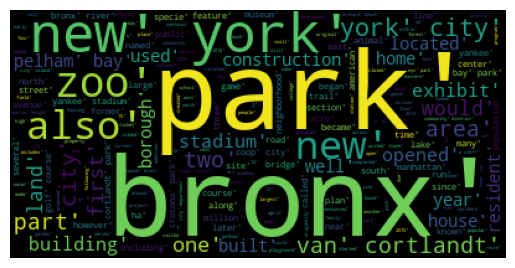

In [72]:
import wordcloud
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Re-create document from filtered tokens
    return ' '.join(lemmatized_words)

temp[0] = clean_text(temp[0])
temp[0] = temp[0].split(" ")

word_cloud = wordcloud.WordCloud().generate(str(temp[0]))
for word in temp[0]:
    print(word)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


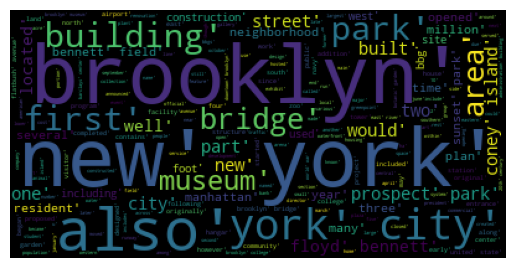

In [73]:
temp[1] = clean_text(temp[1])
temp[1] = temp[1].split(" ")

word_cloud = wordcloud.WordCloud().generate(str(temp[1]))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

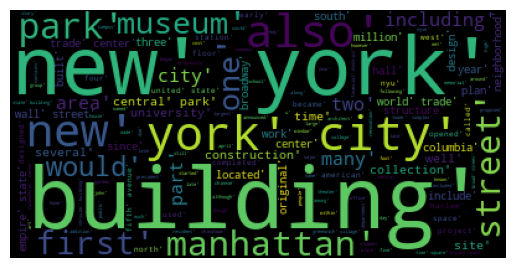

In [74]:
temp[2] = clean_text(temp[2])
temp[2] = temp[2].split(" ")

word_cloud = wordcloud.WordCloud().generate(str(temp[2]))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

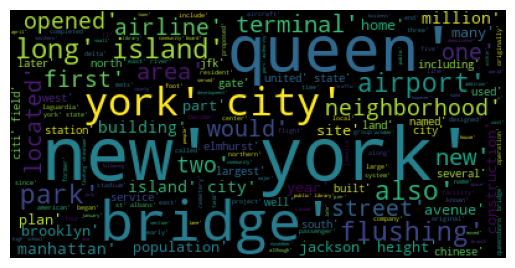

In [75]:
temp[3] = clean_text(temp[3])
temp[3] = temp[3].split(" ")

word_cloud = wordcloud.WordCloud().generate(str(temp[3]))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

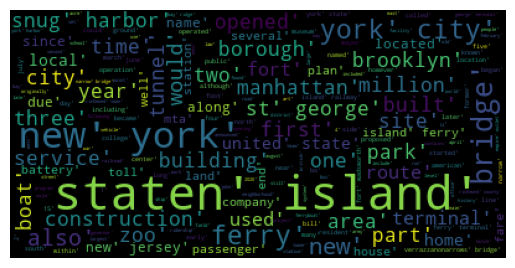

In [76]:
temp[4] = clean_text(temp[4])
temp[4] = temp[4].split(" ")

word_cloud = wordcloud.WordCloud().generate(str(temp[4]))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [45]:
for borough in temp:
    print(len(borough.split(" ")))
#manhatten
#brooklyn
#queens
#bronx
#state island

65493
108013
191659
73887
43889
